# Task 8: Random Forest vs Decision Tree

● Train a RandomForestClassifier on the same dataset used for Task 5.

● Compare accuracy, precision, and recall with the standalone decision tree.

● Plot feature importances.

In [1]:
url = "https://raw.githubusercontent.com/ShubhamSinghal12/GLA_pythonML2025/refs/heads/main/LogisticRegression/Titanic.csv"

Decision Tree

Accuracy: 0.7988826815642458
Precision: 0.796875
Recall: 0.6891891891891891

Random Forest

Accuracy: 0.7988826815642458
Precision: 0.7638888888888888
Recall: 0.7432432432432432


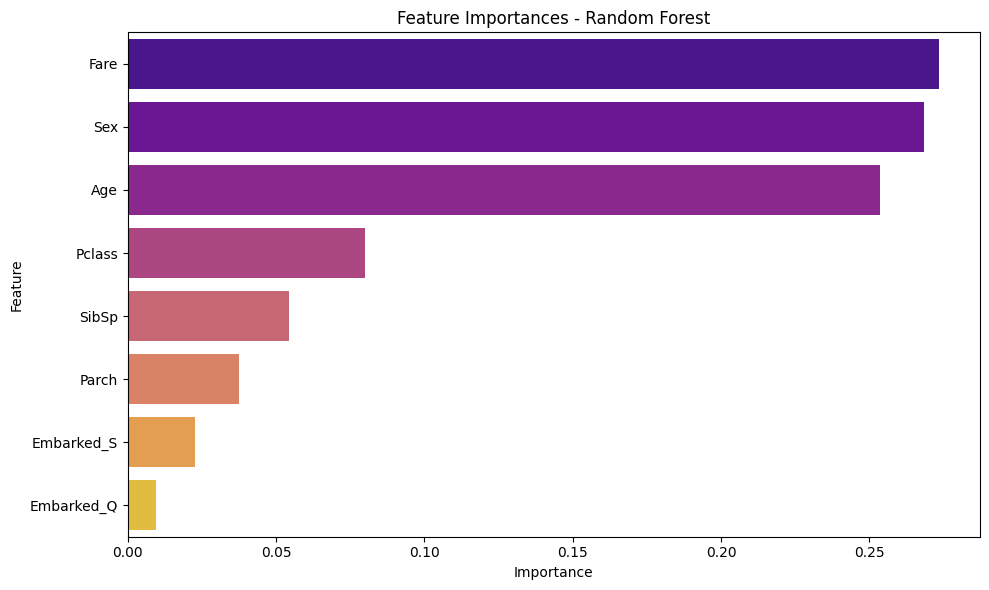

In [2]:
# Task 8: Random Forest vs Decision Tree

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns


# Load Titanic dataset

df = pd.read_csv(url)

# Select relevant features

features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
df = df[features + ['Survived']]

# Handle missing values

df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Encode categorical variables

df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

# Split dataset

X = df.drop('Survived', axis=1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree (for comparison)

dt = DecisionTreeClassifier(random_state=42, max_depth=3)
dt.fit(X_train, y_train)
dt_preds = dt.predict(X_test)

# Train Random Forest

rf = RandomForestClassifier(random_state=42, n_estimators=100)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)

# Evaluation

print("Decision Tree\n")
print("Accuracy:", accuracy_score(y_test, dt_preds))
print("Precision:", precision_score(y_test, dt_preds))
print("Recall:", recall_score(y_test, dt_preds))

print("\nRandom Forest\n")
print("Accuracy:", accuracy_score(y_test, rf_preds))
print("Precision:", precision_score(y_test, rf_preds))
print("Recall:", recall_score(y_test, rf_preds))

# Feature Importance Plot (Random Forest)

imp = rf.feature_importances_
feature_names = X.columns
feat_df = pd.DataFrame({'Feature': feature_names, 'Importance': imp})
feat_df = feat_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feat_df, hue='Feature', palette='plasma', dodge=False,
 legend=False)
plt.title("Feature Importances - Random Forest")
plt.tight_layout()
plt.show()
